In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')
df.head()

,product_name,brand_name,rating,rating_count,marked_price,discounted_price,sizes,product_link,img_link,product_tag,brand_tag,discount_amount,discount_percent
0,Croc Textured Two Fold Wallet,Lino Perros,0.0,0,1295,828,Onesize,wallets/lino-perros/lino-perros-women-peach-co...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",wallets,lino-perros,467,36
1,Men Striped Sliders,Mast & Harbour,4.0,76,1299,584,"UK6,UK7,UK8,UK9,UK10,UK11",flip-flops/mast--harbour/mast--harbour-men-nav...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",flip-flops,mast--harbour,715,55
2,Printed A-line Kurta,Biba,4.3,66,1999,1599,"S,M,L,XL,XXL,3XL",kurtas/biba/biba-women-off-white--black-printe...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurtas,biba,400,20
3,Girls Floral Printed T-shirt,Anthrilo,0.0,0,599,539,"7-8Y,8-9Y,9-10Y",tshirts/anthrilo/anthrilo-girls-white-floral-p...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",tshirts,anthrilo,60,10
4,Women Printed Kurta with Skirt,FASHION DWAR,0.0,0,2899,2899,"S,M,L,XL",kurta-sets/fashion-dwar/fashion-dwar-women-mul...,"https://assets.myntassets.com/dpr_2,q_60,w_210...",kurta-sets,fashion-dwar,0,0


### 1. How many unique products are there in the dataset? (5 marks)
You need to find product ID of each product from product_link and then find the number of unique product ids

- Finding Unique Products as per their Product ID
- Removing Products with Duplicate Product ID

In [2]:
df['product_id'] = [int(prod_link.split('/')[-2]) for prod_link in df.product_link]
df = df.drop_duplicates(subset = ['product_id'])
len(df)

146435

### 2. What is the average rating of the products? (2 mark)
- Try it without the product that are having rating 0
- Try it without the product that are having 0 people given any rating

In [3]:
# average rating of the products without product having rating 0
print(np.mean(df[df['rating'] != 0]['rating']))
# average rating of the products without product that are having 0 people given any rating
print(np.mean(df[df['rating_count'] != 0]['rating']))
# average rating of the products
print(np.mean(df['rating']))

4.1678571867510605
4.1678571867510605
2.3158240857718444


### 3. What is the average discount percentage of the products? (1 mark)

In [4]:
print(np.mean(df.discount_percent))

37.15093386144023


### 4. What are the top 5 most expensive products? (2 marks)
- Make sure that there can be multiple brands with same name so you can take brand ID also into considration

In [5]:
df.groupby('product_name')['discounted_price'].mean().sort_values(ascending = False).head()

product_name
Lord Krishna Showpiece              45599.0
Airwrap Complete Hair Styler        44900.0
Mid-Rise Stretchable Jeans          41000.0
Printed Carpets                     40350.0
Men Brass Dial & Automatic Watch    40050.0
Name: discounted_price, dtype: float64

### 5. What are the top 10 brands by the number of products in the dataset? (2 mark)

In [6]:
df.groupby('brand_name').size().sort_values(ascending = False).head(10)

brand_name
Roadster                 4557
Mast & Harbour           2397
DressBerry               2073
H&M                      1998
Anouk                    1784
max                      1772
HRX by Hrithik Roshan    1734
Puma                     1667
MANGO                    1625
HERE&NOW                 1612
dtype: int64

### 6. List top 5 brands with maxiumum average rating of products? (2 marks)
Neglect the products which are not reviewed by any person

In [7]:
df[df['rating_count']!=0].groupby('brand_name')['rating'].mean().sort_values(ascending = False).head()

brand_name
1 Stop Fashion          5.0
Heel & Buckle London    5.0
Cetaphil                5.0
Joseph Joseph           5.0
Jove                    5.0
Name: rating, dtype: float64

### 7. Plot a histogram of the distribution of ratings of following brand. (3 marks)
- H&M
- max
- Puma
- MANGO

Neglect the products which are not reviewed by any person

<Axes: xlabel='rating', ylabel='Count'>

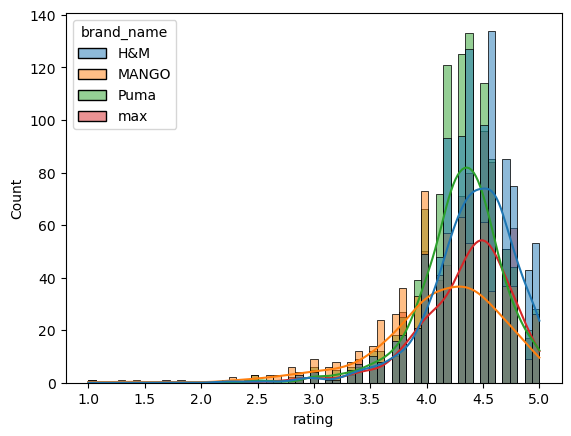

In [8]:
brands = ['H&M', 'max', 'Puma', 'MANGO']
rating_df = df[df['brand_name'].isin(brands)]
rating_df = rating_df[rating_df['rating_count']!=0]

sns.histplot(data = rating_df, x = 'rating', hue = 'brand_name', kde = True )

### 8. What is the distribution of discounts by brand for specific brands mentioned below? (2 marks)

- H&M
- max
- Puma
- MANGO

Neglect the products which are not reviewed by any person.
Neglect the products which are not on any discount.

<Axes: xlabel='discount_percent', ylabel='Count'>

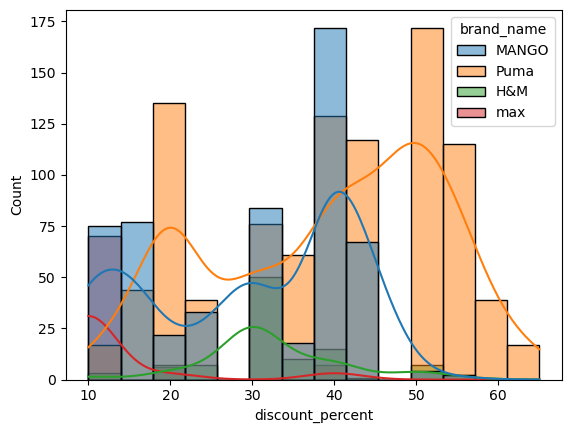

In [9]:
brands = ['H&M', 'max', 'Puma', 'MANGO']
discount_df = df[df['brand_name'].isin(brands)]
discount_df = discount_df[discount_df['rating_count']!=0]
discount_df = discount_df[discount_df['discount_percent']!=0]

sns.histplot(data = discount_df, x = 'discount_percent', hue = 'brand_name', kde = True)

### 9. Is there any trend or pattern you can find between discount percent and rating of the product? (3 marks)

<Axes: xlabel='rating', ylabel='discount_percent'>

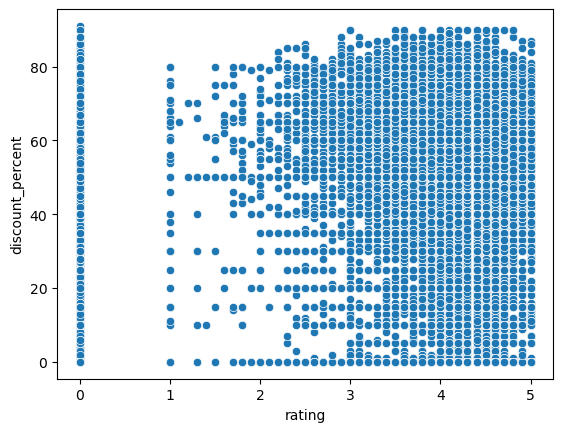

In [10]:
relation_df = df[['rating','discount_percent']]
sns.scatterplot(data=relation_df, x = 'rating',y = 'discount_percent' )

### 10. What are the top 10 most popular tags in the dataset? (2 marks)

In [11]:
df.groupby('product_tag').size().sort_values(ascending = False).head(10)

product_tag
tshirts         14885
shirts          10659
dresses         10350
tops             7773
kurta-sets       7156
kurtas           7077
jeans            6957
trousers         5145
casual-shoes     4719
handbags         4367
dtype: int64

### 11. Are there any relations between the rating and number of people who rated the products? (4 marks)
- Neglect the products that are not reviewed by any person
- Neglect the products that are having zero rating

<Axes: xlabel='rating_count', ylabel='rating'>

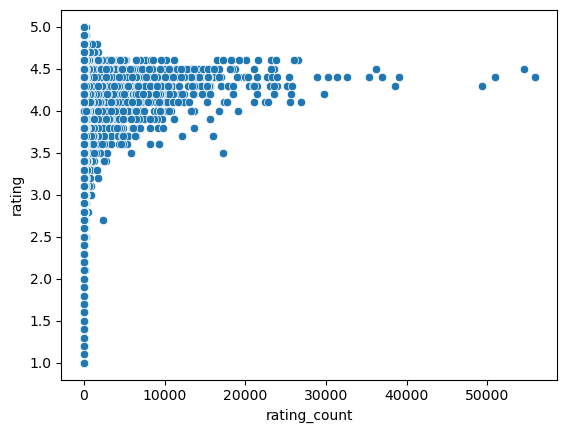

In [12]:
rel_df = df[df['rating_count']!=0]
rel_df = rel_df[rel_df['rating']!=0]
sns.scatterplot(data = rel_df, x = 'rating_count', y = 'rating')

### 12. What are the top 10 Most Expensive brands? (3 marks)
- Use marked price as the reference to find the most expensive brand

In [13]:
df.groupby('brand_name')['marked_price'].mean().sort_values(ascending=False).head(10)

brand_name
EARNSHAW                 46950.000000
Victorinox               44000.000000
MOSCHINO COUTURE         40000.000000
dyson                    39233.333333
Tom Ford                 38800.000000
Valuchi                  38050.000000
Bottega Veneta           34490.000000
Versace Jeans Couture    33125.000000
TISSOT                   31928.571429
DUCATI CORSE             29999.000000
Name: marked_price, dtype: float64

### 13. What are the top 10 Most Expensive Product Category? (4 marks)
- Use marked price as the reference to find the most expensive brand

In [14]:
df.groupby('product_tag')['marked_price'].mean().sort_values(ascending = False).head(10)

product_tag
trolley-bag           13331.718631
suits                 12148.698182
fitness-bands         11713.285714
watch-gift-set        11113.266667
badminton-racquets    10850.000000
sherwani              10145.069930
floor-lamps            9433.393939
smart-watches          8929.726457
air-fryer              8850.000000
carpets                8834.657534
Name: marked_price, dtype: float64

### 14. Analyse the Violen Plot of watches of following brands mentioned below ? (5 marks)

 - Take Marked Price for Reference
 - Take product_tag as watches
 - Take brand_tag as tommy-hilfiger, daniel-wellington, armani-exchange, emporio-armani, earnshaw, tissot
 - Make sure to write your inference based on the violen plot of following watch brands price

<Axes: xlabel='marked_price', ylabel='brand_tag'>

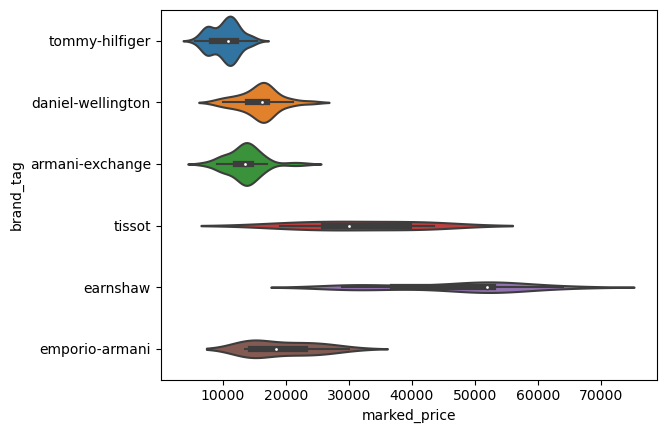

In [15]:
brands = ['tommy-hilfiger', 'daniel-wellington', 'armani-exchange', 'emporio-armani', 'earnshaw', 'tissot']
watch_df = df[df['product_tag']=='watches']
watch_df = watch_df[watch_df['brand_tag'].isin(brands)]

sns.violinplot(data = watch_df, x = 'marked_price', y = 'brand_tag')

#### From above plot we can see that tissot, earnshaw, emporio-armani have more wide range watches available as compared to other given brands

### 15. List top 5 brands which are having most wide range or products
- Use marked price as the reference

In [17]:
df_pr = df.groupby('brand_tag')['marked_price'].agg([np.max, np.min]).reset_index()
df_pr['diff'] = abs(df_pr['amax'] - df_pr['amin'])
df_pr.sort_values(by = 'diff', ascending = False).head(5)['brand_tag'].values

array(['ecraftindia', 'ddecor', 'calvin-klein', 'd1-milano', 'masaba'],
      dtype=object)